### Installing Important Libraries

In [1]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 8.5 MB/s eta 0:00:02
     --- ------------------------------------ 1.2/12.8 MB 7.7 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 9.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 8.5 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 8.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 8.2 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.8 MB 8.2 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 7.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 7

In [3]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Pa

In [6]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pyspellchecker

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import spacy
import emoji
from nltk.stem import WordNetLemmatizer, PorterStemmer
import html
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Reading the Dataset

#### Train Dataset

In [146]:
train_data = pd.read_csv('C:/Users/kshitiz.s.lv/Downloads/Train_Reviews.csv')
train_data.head()

,Name,On a Scale of 1-5 Rate the Place,A Detailed Review of the Place
0,Prakash,4.0,Awesome experience with a friend who was in a ...
1,Prashanth,3.0,It was a good visit to the Zoo. My son loved a...
2,Ashwin J,3.0,Have been wanting to visit this place since th...
3,Amit Khare,2.0,It was too overcrowded even to have a look pro...
4,ChennaiShaji,4.0,A land mark which you cannot miss while in the...


In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              706 non-null    object 
 1   On a Scale of 1-5 Rate the Place  676 non-null    float64
 2   A Detailed Review of the Place    705 non-null    object 
dtypes: float64(1), object(2)
memory usage: 16.7+ KB


#### Test Dataset

In [148]:
test_data = pd.read_csv('C:/Users/kshitiz.s.lv/Downloads/Test_Reviews.csv')
test_data.head()

,Name,A Detailed Review of the Place
0,OctOriental,"Great hub of hanging out, boating, eating and ..."
1,Konganapally Laasya,It’s good and it was so long ago that I comple...
2,ShubH GhosH,Must be an imposing structure but really cant ...
3,Deepyayan Ghosh,Hussain Sagar Lake adds a good view but from a...
4,Shalini N,The temple is situated on a hilltop. The view...


In [149]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Name                            348 non-null    object
 1   A Detailed Review of the Place  348 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


## Data Preprocessing

#### Train Data

In [150]:
train_data = train_data.dropna()

In [151]:
def get_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'
    
train_data['Sentiment based on Ratings Scale 1-5'] = train_data['On a Scale of 1-5 Rate the Place'].apply(get_sentiment)
train_data.head()

,Name,On a Scale of 1-5 Rate the Place,A Detailed Review of the Place,Sentiment based on Ratings Scale 1-5
0,Prakash,4.0,Awesome experience with a friend who was in a ...,Positive
1,Prashanth,3.0,It was a good visit to the Zoo. My son loved a...,Neutral
2,Ashwin J,3.0,Have been wanting to visit this place since th...,Neutral
3,Amit Khare,2.0,It was too overcrowded even to have a look pro...,Negative
4,ChennaiShaji,4.0,A land mark which you cannot miss while in the...,Positive


In [152]:
train_data.drop('Name', axis=1, inplace=True)
train_data

,On a Scale of 1-5 Rate the Place,A Detailed Review of the Place,Sentiment based on Ratings Scale 1-5
0,4.0,Awesome experience with a friend who was in a ...,Positive
1,3.0,It was a good visit to the Zoo. My son loved a...,Neutral
2,3.0,Have been wanting to visit this place since th...,Neutral
3,2.0,It was too overcrowded even to have a look pro...,Negative
4,4.0,A land mark which you cannot miss while in the...,Positive
...,...,...,...
700,4.0,The Nehru Zoological in Hyderabad is a very we...,Positive
701,1.0,A very rarely visited and populated Sight Seei...,Negative
702,2.0,Overall no maintenance of this place. Plastic ...,Negative
704,4.0,This place will give you good pleasant nature ...,Positive


#### Test Data

In [153]:
test_data = test_data.dropna()

In [154]:
test_data.drop('Name', axis=1, inplace=True)
test_data

,A Detailed Review of the Place
0,"Great hub of hanging out, boating, eating and ..."
1,It’s good and it was so long ago that I comple...
2,Must be an imposing structure but really cant ...
3,Hussain Sagar Lake adds a good view but from a...
4,The temple is situated on a hilltop. The view...
...,...
343,The lake is beautiful when viewed from a dista...
344,The Buddha statue can be seen from near throug...
345,Wonderla is a very enthusiastic place to get t...
346,The towering statue of Gautam Buddha in the mi...


#### Text Cleaning 

In [155]:
contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
                "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
                "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                "he'd've": "he would have", "he'll": "he will", "he's": "he is", "how'd": "how did","Itâ€™s":"It is",
                "how'll": "how will", "how's": "how is", "I'd": "I would", "I'll": "I will", "I'm": "I am",
                "I've": "I have", "isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is",  "It's": "It is",
                "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                "mightn't": "might not", "must've": "must have", "mustn't": "must not", "needn't": "need not",
                "oughtn't": "ought not", "shan't": "shall not", "sha'n't": "shall not", "she'd": "she would",
                "she'll": "she will", "she's": "she is", "should've": "should have", "shouldn't": "should not",
                "that'd": "that would", "that's": "that is", "there'd": "there would", "there's": "there is",
                "they'd": "they would", "they'll": "they will", "they're": "they are", "they've": "they have",
                "wasn't": "was not", "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have",
                "weren't": "were not", "what'll": "what will", "what're": "what are", "what's": "what is",
                "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                "where's": "where is", "where've": "where have", "who'll": "who will", "who's": "who is",
                "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                "won't": "will not", "would've": "would have", "wouldn't": "would not", "y'all": "you all",
                "you'd": "you would", "you'll": "you will", "you're": "you are", "you've": "you have"}

def clean_and_format_sentence(text):
    if pd.isna(text):
        return ''
    
    text = text.lower()
    
    for contraction, replacement in contractions.items():
        text = re.sub(contraction, replacement, text)

    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\S*\d\S*)', ' ', str(text))

    text = emoji.demojize(text)
    text = re.sub(r':[a-z_]+:', '', text)

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    sentences = [sentence.capitalize() for sentence in sentences if sentence]

    cleaned_text = ' '.join(sentences) + '.' if sentences else ''

    return cleaned_text

##### Text Cleaning - Train Dataset

In [156]:
train_data['A Detailed Review of the Place'] = train_data['A Detailed Review of the Place'].apply(clean_and_format_sentence)
train_data.head()

,On a Scale of 1-5 Rate the Place,A Detailed Review of the Place,Sentiment based on Ratings Scale 1-5
0,4.0,Awesome experience with a friend who was in a ...,Positive
1,3.0,It was a good visit to the zoo my son loved a...,Neutral
2,3.0,Have been wanting to visit this place since th...,Neutral
3,2.0,It was too overcrowded even to have a look pro...,Negative
4,4.0,A land mark which you cannot miss while in the...,Positive


In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 705
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   On a Scale of 1-5 Rate the Place      675 non-null    float64
 1   A Detailed Review of the Place        675 non-null    object 
 2   Sentiment based on Ratings Scale 1-5  675 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.1+ KB


In [158]:
train_data['Sentiment based on Ratings Scale 1-5'].value_counts()

Sentiment based on Ratings Scale 1-5
Positive    550
Neutral      76
Negative     49
Name: count, dtype: int64

##### Text Cleaning - Test Dataset

In [159]:
test_data['A Detailed Review of the Place'] = test_data['A Detailed Review of the Place'].apply(clean_and_format_sentence)
test_data.head()

,A Detailed Review of the Place
0,Great hub of hanging out boating eating and ...
1,It s good and it was so long ago that i comple...
2,Must be an imposing structure but really cant ...
3,Hussain sagar lake adds a good view but from a...
4,The temple is situated on a hilltop the view...


In [171]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   A Detailed Review of the Place  348 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


### Sentiment Analysis

#### Training Dataset

In [160]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshitiz.s.lv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [161]:
sid = SentimentIntensityAnalyzer()

train_data['Sentiment'] = train_data['A Detailed Review of the Place'].apply(lambda x: sid.polarity_scores(x)['compound'])
train_data['Sentiment_by_Model'] = train_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

train_data_sentiment_label = train_data[['A Detailed Review of the Place', 'Sentiment', 'Sentiment based on Ratings Scale 1-5', 'Sentiment_by_Model']]
train_data_sentiment_label.head()

,A Detailed Review of the Place,Sentiment,Sentiment based on Ratings Scale 1-5,Sentiment_by_Model
0,Awesome experience with a friend who was in a ...,0.4404,Positive,Positive
1,It was a good visit to the zoo my son loved a...,0.8462,Neutral,Positive
2,Have been wanting to visit this place since th...,-0.9053,Neutral,Negative
3,It was too overcrowded even to have a look pro...,0.0516,Negative,Positive
4,A land mark which you cannot miss while in the...,0.1139,Positive,Positive


In [162]:
train_data_sentiment_label['Sentiment_by_Model'].value_counts()

Sentiment_by_Model
Positive    594
Negative     65
Neutral      16
Name: count, dtype: int64

In [163]:
train_data_sentiment_label = train_data_sentiment_label.drop('Sentiment', axis=1)
train_data_sentiment_label

,A Detailed Review of the Place,Sentiment based on Ratings Scale 1-5,Sentiment_by_Model
0,Awesome experience with a friend who was in a ...,Positive,Positive
1,It was a good visit to the zoo my son loved a...,Neutral,Positive
2,Have been wanting to visit this place since th...,Neutral,Negative
3,It was too overcrowded even to have a look pro...,Negative,Positive
4,A land mark which you cannot miss while in the...,Positive,Positive
...,...,...,...
700,The nehru zoological in hyderabad is a very we...,Positive,Positive
701,A very rarely visited and populated sight seei...,Negative,Negative
702,Overall no maintenance of this place plastic ...,Negative,Negative
704,This place will give you good pleasant nature ...,Positive,Positive


In [164]:
train_data_sentiment_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 705
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   A Detailed Review of the Place        675 non-null    object
 1   Sentiment based on Ratings Scale 1-5  675 non-null    object
 2   Sentiment_by_Model                    675 non-null    object
dtypes: object(3)
memory usage: 21.1+ KB


In [165]:
accuracy = accuracy_score(train_data_sentiment_label['Sentiment based on Ratings Scale 1-5'], train_data_sentiment_label['Sentiment_by_Model'])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.78%


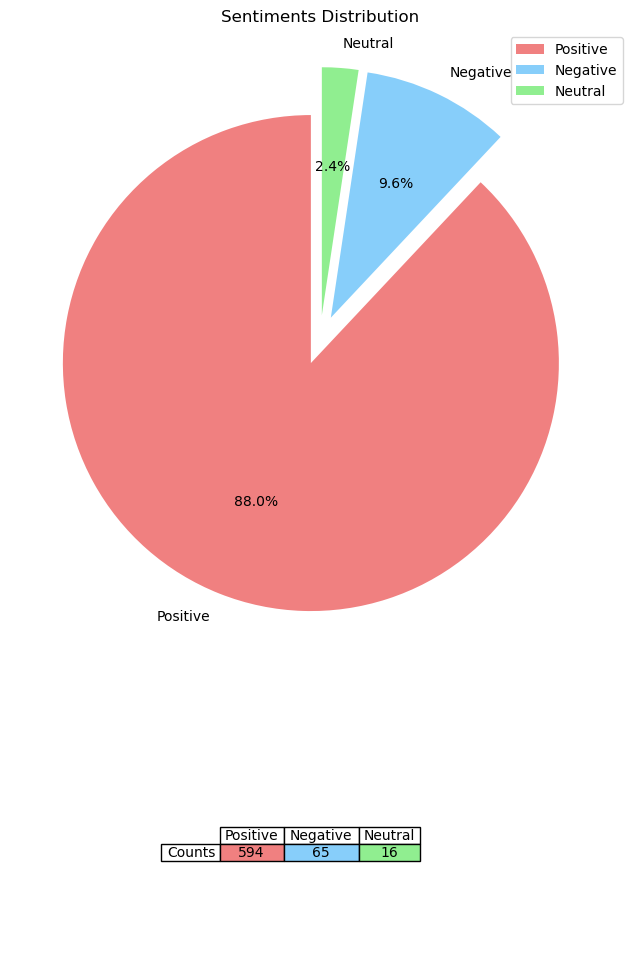

In [184]:
sentiment_counts = train_data['Sentiment_by_Model'].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0.1, 0.1) 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
ax1.set_title('Sentiments Distribution')

ax1.legend(labels=sentiment_counts.index, loc='upper right')

table_data = [sentiment_counts.values]
table_row_labels = ['Counts']
table_col_labels = sentiment_counts.index

cell_colors = [colors]  

ax2.axis('off')
table = ax2.table(cellText=table_data, rowLabels=table_row_labels, colLabels=table_col_labels, loc='center', cellLoc='center', cellColours=cell_colors)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])  

plt.show()

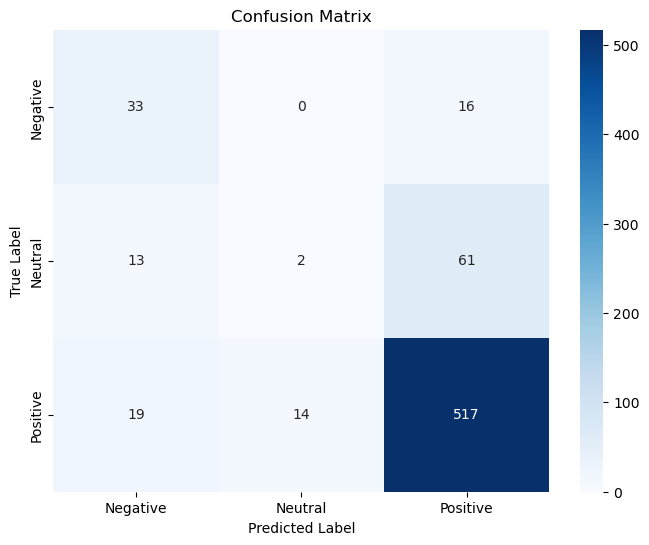

In [170]:
y_true = train_data_sentiment_label['Sentiment based on Ratings Scale 1-5']
y_pred = train_data_sentiment_label['Sentiment_by_Model']

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Test Dataset

In [172]:
test_data['Sentiment'] = test_data['A Detailed Review of the Place'].apply(lambda x: sid.polarity_scores(x)['compound'])
test_data['Sentiment_by_Model'] = test_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

test_data_sentiment_label = test_data[['A Detailed Review of the Place', 'Sentiment_by_Model']]
test_data_sentiment_label.head()

,A Detailed Review of the Place,Sentiment_by_Model
0,Great hub of hanging out boating eating and ...,Positive
1,It s good and it was so long ago that i comple...,Positive
2,Must be an imposing structure but really cant ...,Negative
3,Hussain sagar lake adds a good view but from a...,Positive
4,The temple is situated on a hilltop the view...,Positive


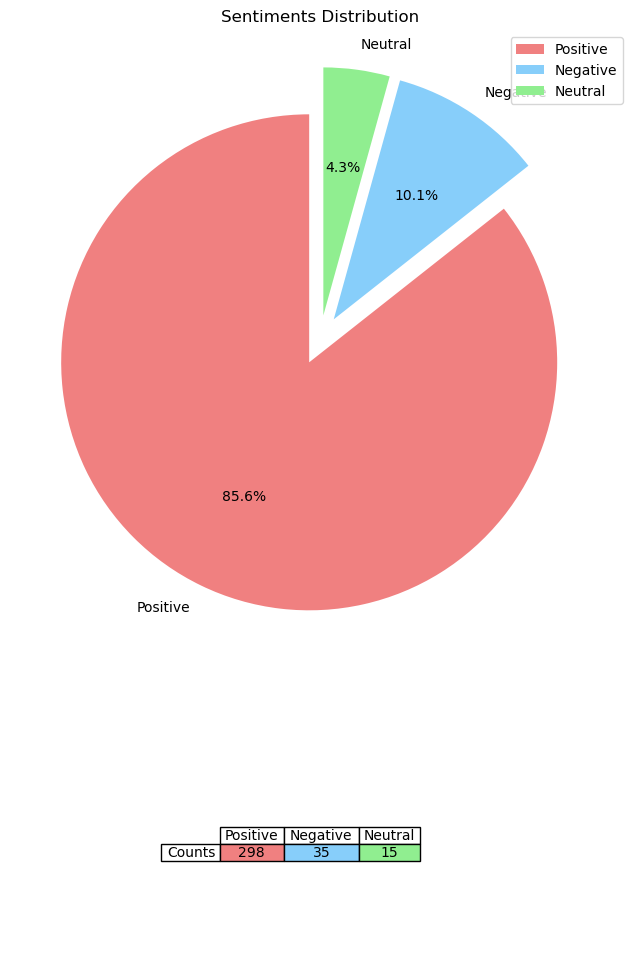

In [183]:
sentiment_counts = test_data['Sentiment_by_Model'].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0.1, 0.1) 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
ax1.set_title('Sentiments Distribution')

ax1.legend(labels=sentiment_counts.index, loc='upper right')

table_data = [sentiment_counts.values]
table_row_labels = ['Counts']
table_col_labels = sentiment_counts.index

cell_colors = [colors]  

ax2.axis('off')
table = ax2.table(cellText=table_data, rowLabels=table_row_labels, colLabels=table_col_labels, loc='center', cellLoc='center', cellColours=cell_colors)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])  

plt.show()